## Task 2(Bonus)
- there can be raw DNA data files with different number of sequences. Based on your solution code
above, create a function that is able to take in new data files in similar format as dna_raw.txt with
different number of sequences, and produce the same results above
- you have received also another DNA codes that is more complicated. The file is called
dna_raw_complicated.txt. In this file, each DNA sequence can be composed of multiple lines of data in
the text file. In this case, are you able to solve the task in the same way as before? If not, update your
code to solve the same task with the new data

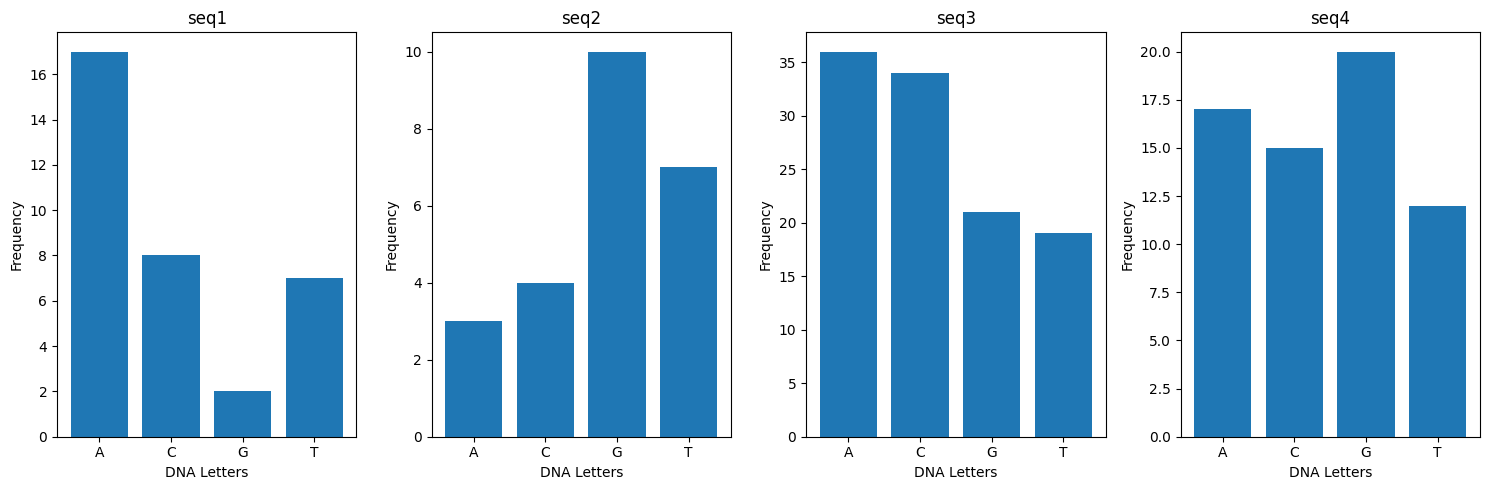

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def extract_and_count_dna_sequence_from_file(text_path):
    
    sequences = []
    
    with open(text_path, 'r') as file:
        seq_id = None
        seq_lines = []
        
        # Read each line and saves Id to variable(seq_id) counts each DNA letter then saves it to a dictonary
        for line in file:
            line = line.strip().lower()
            
            if line.startswith('>'):
                if seq_id is not None:
                    # Joins all sequence rows to a string and counts letters
                    sequence = ''.join(seq_lines)
                    a = sequence.count('a')
                    c = sequence.count('c')
                    g = sequence.count('g')
                    t = sequence.count('t')
                    sequence_dict = {'SeqId': seq_id, 'a-count': a, 'c-count': c, 'g-count': g, 't-count': t}
                    sequences.append(sequence_dict)
                
                seq_id = line.strip('>')
                seq_lines = [] # Resets sequence
            else:
                seq_lines.append(line) # Adds sequence rows in file
        
        # Saves the last sequence afer exiting the loop
        if seq_id is not None:
            sequence = ''.join(seq_lines)
            a = sequence.count('a')
            c = sequence.count('c')
            g = sequence.count('g')
            t = sequence.count('t')
            sequence_dict = {'SeqId': seq_id, 'a-count': a, 'c-count': c, 'g-count': g, 't-count': t}
            sequences.append(sequence_dict)
    
    return sequences

def draw_bar_graph(sequence_list):
    # Had to look up how to create bar-graph
    fig, ax = plt.subplots(1, len(sequences), figsize=(15, 5)) # Sets how many rows, columns the graphs will be shown and size of the graph

    for i in range(len(sequences)):
        x = np.array(['A', 'C', 'G', 'T']) # Sets x-axel
        y = np.array([sequences[i]['a-count'], sequences[i]['c-count'], sequences[i]['g-count'], sequences[i]['t-count']]) # Sets y-axel for eaxh x-axel
        
        ax[i].bar(x, y) # Creates bar-graph
        ax[i].set_title(sequences[i]['SeqId']) # Sets title of graph
        ax[i].set_xlabel('DNA Letters') # Sets label of x-axel
        ax[i].set_ylabel('Frequency') # Sets label of y-axel

    plt.tight_layout()
    
    plt.show()


text_path = 'data/dna_raw_complicated.txt'
sequences = extract_and_count_dna_sequence_from_file(text_path)
draw_bar_graph(sequences)
